# Lectures 5: Class demo

## Imports

In [1]:
# import the libraries
import os
import sys
sys.path.append(os.path.join(os.path.abspath(".."), (".."), "code"))
from plotting_functions import *
from utils import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

%matplotlib inline

pd.set_option("display.max_colwidth", 200)
DATA_DIR = os.path.join(os.path.abspath(".."), (".."), "data/")
pd.set_option("display.max_colwidth", 200)

## Incorporating text features in the Spotify dataset

Recall that we had dropped `song_title` feature when we worked with the Spotify dataset in Lab 1. 

Let's try to include it in our pipeline and examine whether we get better results. 

In [3]:
spotify_df = pd.read_csv(DATA_DIR + "spotify.csv", index_col=0)
X_spotify = spotify_df.drop(columns=["target"])
y_spotify = spotify_df["target"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_spotify, y_spotify, test_size=0.2, random_state=123
)

In [5]:
X_train.shape

(1613, 15)

In [6]:
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist
1505,0.004770,0.585,214740,0.614,0.000155,10,0.0762,-5.594,0,0.0370,114.059,4.0,0.2730,Cool for the Summer,Demi Lovato
813,0.114000,0.665,216728,0.513,0.303000,0,0.1220,-7.314,1,0.3310,100.344,3.0,0.0373,Damn Son Where'd You Find This? (feat. Kelly Holiday) - Markus Maximus Remix,Markus Maximus
615,0.030200,0.798,216585,0.481,0.000000,7,0.1280,-10.488,1,0.3140,127.136,4.0,0.6400,Trill Hoe,Western Tink
319,0.106000,0.912,194040,0.317,0.000208,6,0.0723,-12.719,0,0.0378,99.346,4.0,0.9490,Who Is He (And What Is He to You?),Bill Withers
320,0.021100,0.697,236456,0.905,0.893000,6,0.1190,-7.787,0,0.0339,119.977,4.0,0.3110,Acamar,Frankey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.001060,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.2110,Like A Bitch - Kill The Noise Remix,Kill The Noise
1346,0.000021,0.535,203500,0.974,0.000149,10,0.2630,-3.566,0,0.1720,116.956,4.0,0.4310,Flag of the Beast,Emmure
1406,0.503000,0.410,256333,0.648,0.000000,7,0.2190,-4.469,1,0.0362,60.391,4.0,0.3420,Don't You Cry For Me,Cobi
1389,0.705000,0.894,222307,0.161,0.003300,4,0.3120,-14.311,1,0.0880,104.968,4.0,0.8180,장가갈 수 있을까 Can I Get Married?,Coffeeboy


In [7]:
X_train.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'song_title',
       'artist'],
      dtype='object')

### Dummy model 

In [8]:
from sklearn.dummy import DummyClassifier

results = {}
dummy_model = DummyClassifier()
# mean_std_cross_val_scores is defined in ../code/utils.py
results['dummy'] = mean_std_cross_val_scores(dummy_model, X_train, y_train, return_train_score = True) 
pd.DataFrame(results)

,dummy
fit_time,0.001 (+/- 0.000)
score_time,0.001 (+/- 0.000)
test_score,0.508 (+/- 0.001)
train_score,0.508 (+/- 0.000)


### Feature categorization

In [9]:
X_train.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'song_title',
       'artist'],
      dtype='object')

In [10]:
X_train["key"].value_counts()

key
1     200
7     169
0     166
9     152
2     145
11    143
5     141
6     127
10    122
8     110
4      88
3      50
Name: count, dtype: int64

In [11]:
X_train["time_signature"].value_counts()

time_signature
4.0    1514
3.0      76
5.0      22
1.0       1
Name: count, dtype: int64

In [12]:
X_train["mode"].value_counts()

mode
1    1002
0     611
Name: count, dtype: int64

Let's look at the distribution of values in the `song_title` column. 

In [13]:
X_train["song_title"].value_counts()

song_title
Pyramids                                     2
Look At Wrist                                2
Baby                                         2
The One                                      2
Best Friend                                  2
                                            ..
City Of Dreams - Radio Edit                  1
Face It                                      1
The Winner Is - from Little Miss Sunshine    1
History                                      1
Blue Ballad                                  1
Name: count, Length: 1579, dtype: int64

- Most of the song titles are unique, which makes sense. 
- What would happen if we apply one-hot encoding to this feature? 
- How about encoding this as a text feature? 

In [14]:
X_train["artist"].value_counts()

artist
Drake              14
Disclosure         12
Rick Ross          11
WALK THE MOON      10
Crystal Castles     8
                   ..
Classixx            1
Jordan Feliz        1
Travis Hayes        1
The Silvertones     1
Phil Woods          1
Name: count, Length: 1131, dtype: int64

In [15]:
numeric_feats = ['acousticness', 'danceability', 'energy',
                 'instrumentalness', 'liveness', 'loudness',
                 'speechiness', 'tempo', 'valence']
categorical_feats = ['time_signature', 'key']
passthrough_feats = ['mode']
artist_cat_feat = ['artist']
text_feat = 'song_title' # Define the text feature

```{important}
Note that unlike other feature types we are defining `text_feature` as a string and not as a list. 
```

### Column transformer without `song_title` and `artist` features

In [16]:
preprocessor_no_text = make_column_transformer(
    (StandardScaler(), numeric_feats), 
    ("passthrough", passthrough_feats),     
    (OneHotEncoder(handle_unknown = "ignore"), categorical_feats),     
)

### Visualizing the transformed data 

In [17]:
transformed_no_text = preprocessor_no_text.fit_transform(X_train)
transformed_no_text.shape

(1613, 26)

In [18]:
preprocessor_no_text

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['acousticness', 'danceability', 'energy',
                                  'instrumentalness', 'liveness', 'loudness',
                                  'speechiness', 'tempo', 'valence']),
                                ('passthrough', 'passthrough', ['mode']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['time_signature', 'key'])])

In [19]:
ohe_feat_names = preprocessor_no_text.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
ohe_feat_names

['time_signature_1.0',
 'time_signature_3.0',
 'time_signature_4.0',
 'time_signature_5.0',
 'key_0',
 'key_1',
 'key_2',
 'key_3',
 'key_4',
 'key_5',
 'key_6',
 'key_7',
 'key_8',
 'key_9',
 'key_10',
 'key_11']

In [20]:
feat_names = numeric_feats + passthrough_feats + ohe_feat_names

In [21]:
pd.DataFrame(transformed_no_text, columns=feat_names)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,-0.697633,-0.194548,-0.318116,-0.492359,-0.737898,0.395794,-0.617752,-0.293827,-0.908149,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.276291,0.295726,-0.795552,0.598355,-0.438792,-0.052394,2.728394,-0.802595,-1.861238,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.599540,1.110806,-0.946819,-0.492917,-0.399607,-0.879457,2.534909,0.191274,0.575870,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.307150,1.809445,-1.722063,-0.492168,-0.763368,-1.460798,-0.608647,-0.839616,1.825358,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.634642,0.491835,1.057468,2.723273,-0.458384,-0.175645,-0.653035,-0.074294,-0.754491,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,-0.711944,-0.200676,1.185100,-0.483229,-0.393077,0.941176,2.751157,-1.743639,-1.158856,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1609,-0.715953,-0.500969,1.383637,-0.492380,0.482038,0.924239,0.918743,-0.186361,-0.269253,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1610,1.224228,-1.267021,-0.157395,-0.492917,0.194687,0.688940,-0.626857,-2.284681,-0.629138,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1611,2.003419,1.699134,-2.459489,-0.481032,0.802042,-1.875632,-0.037298,-0.631064,1.295640,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Building models

In [22]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()    
}

for (name, model) in models.items():
    pipe_model = make_pipeline(preprocessor_no_text, model)
    results[name + " (no_text)"] = mean_std_cross_val_scores(pipe_model, X_train, y_train, return_train_score=True)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.508 (+/- 0.001),0.508 (+/- 0.000)
Decision Tree (no_text),0.014 (+/- 0.005),0.002 (+/- 0.001),0.689 (+/- 0.030),1.000 (+/- 0.000)
KNN (no_text),0.004 (+/- 0.001),0.010 (+/- 0.016),0.676 (+/- 0.028),0.788 (+/- 0.009)
SVM (no_text),0.046 (+/- 0.013),0.017 (+/- 0.005),0.737 (+/- 0.017),0.806 (+/- 0.011)


<br><br>

### Incorporating "song_title" feature

Let's incorporate bag-of-words representation of "song_title" feature in our column transformer. 

In [23]:
numeric_feats

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

In [24]:
text_feat

'song_title'

In [25]:
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_feats), 
    ("passthrough", passthrough_feats),     
    (OneHotEncoder(handle_unknown = "ignore"), categorical_feats),     
    (CountVectorizer(stop_words="english"), text_feat)
)

In [26]:
# Transform the data
transformed = preprocessor.fit_transform(X_train)

In [27]:
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['acousticness', 'danceability', 'energy',
                                  'instrumentalness', 'liveness', 'loudness',
                                  'speechiness', 'tempo', 'valence']),
                                ('passthrough', 'passthrough', ['mode']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['time_signature', 'key']),
                                ('countvectorizer',
                                 CountVectorizer(stop_words='english'),
                                 'song_title')])

In [28]:
# Get the vocabulary
vocab = preprocessor.named_transformers_['countvectorizer'].get_feature_names_out()

In [29]:
column_names = numeric_feats + passthrough_feats + ohe_feat_names + vocab.tolist()
len(column_names)

1910

In [30]:
df = pd.DataFrame(transformed.toarray(), columns=column_names)
df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,...,너와의,루시아,변명,여기,이곳에서,이대로,있어줘요,있을까,장가갈,지금
0,-0.697633,-0.194548,-0.318116,-0.492359,-0.737898,0.395794,-0.617752,-0.293827,-0.908149,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.276291,0.295726,-0.795552,0.598355,-0.438792,-0.052394,2.728394,-0.802595,-1.861238,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.599540,1.110806,-0.946819,-0.492917,-0.399607,-0.879457,2.534909,0.191274,0.575870,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.307150,1.809445,-1.722063,-0.492168,-0.763368,-1.460798,-0.608647,-0.839616,1.825358,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.634642,0.491835,1.057468,2.723273,-0.458384,-0.175645,-0.653035,-0.074294,-0.754491,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,-0.711944,-0.200676,1.185100,-0.483229,-0.393077,0.941176,2.751157,-1.743639,-1.158856,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1609,-0.715953,-0.500969,1.383637,-0.492380,0.482038,0.924239,0.918743,-0.186361,-0.269253,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1610,1.224228,-1.267021,-0.157395,-0.492917,0.194687,0.688940,-0.626857,-2.284681,-0.629138,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1611,2.003419,1.699134,-2.459489,-0.481032,0.802042,-1.875632,-0.037298,-0.631064,1.295640,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### Visualizing the vocabulary 

In [31]:
vocab[0:10]

array(['000', '10', '100', '10cm', '11', '112', '12', '1208', '144', '18'],
      dtype=object)

In [32]:
vocab[500:510]

array(['duele', 'duet', 'duke', 'dustland', 'dutchie', 'dynamite',
       'earth', 'easy', 'eazy', 'echelon'], dtype=object)

In [33]:
vocab[1800:1810]

array(['wide', 'wifey', 'wild', 'wildcard', 'wildfire', 'wiley',
       'willing', 'win', 'wind', 'window'], dtype=object)

In [34]:
vocab[0::100]

array(['000', 'ap', 'blind', 'cha', 'dallask', 'duele', 'flashlight',
       'grace', 'icarus', 'lafa', 'making', 'neck', 'pharaohs', 'redeem',
       'seeb', 'soundtrack', 'talons', 'unanswered', 'wide'], dtype=object)

Let's find songs containing the word _earth_ in them. 

In [35]:
earth_index_vocab = np.where(vocab == "earth")[0][0]
earth_index_vocab

506

In [36]:
earth_index_in_df = len(numeric_feats) + len(passthrough_feats) + len(ohe_feat_names) + earth_index_vocab
earth_index_in_df

532

In [37]:
earth_songs = df[df.iloc[:, earth_index_in_df] == 1]
earth_songs.iloc[:, earth_index_in_df - 2 : earth_index_in_df + 2]

,dutchie,dynamite,earth,easy
380,0.0,0.0,1.0,0.0
639,0.0,0.0,1.0,0.0


In [38]:
earth_songs.index

Index([380, 639], dtype='int64')

In [39]:
X_train.iloc[earth_songs.index]["song_title"]

1851             Softest Place On Earth
1948    Earth Song - Remastered Version
Name: song_title, dtype: object

### Model building 

In [40]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()    
}

for (name, model) in models.items():
    pipe_model = make_pipeline(preprocessor, model)
    results[name + " (text)"] = mean_std_cross_val_scores(pipe_model, X_train, y_train, return_train_score=True)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.508 (+/- 0.001),0.508 (+/- 0.000)
Decision Tree (no_text),0.014 (+/- 0.005),0.002 (+/- 0.001),0.689 (+/- 0.030),1.000 (+/- 0.000)
KNN (no_text),0.004 (+/- 0.001),0.010 (+/- 0.016),0.676 (+/- 0.028),0.788 (+/- 0.009)
SVM (no_text),0.046 (+/- 0.013),0.017 (+/- 0.005),0.737 (+/- 0.017),0.806 (+/- 0.011)
Decision Tree (text),0.031 (+/- 0.015),0.003 (+/- 0.001),0.706 (+/- 0.027),1.000 (+/- 0.000)
KNN (text),0.008 (+/- 0.001),0.014 (+/- 0.003),0.682 (+/- 0.028),0.786 (+/- 0.010)
SVM (text),0.078 (+/- 0.021),0.027 (+/- 0.029),0.733 (+/- 0.027),0.866 (+/- 0.004)


- Not a big difference in the results. 
- Seems like there is more overfitting when we included the `song_title` feature.
- The training score of SVC is much higher when we include all features. Hyperparameter optimization of `C` and `gamma` may help. 

- What about the `artist` column?
- Does it make sense to apply BOW encoding to it? 
- Let's look at the distribution of values in the `artist` column. 

In [41]:
X_train['artist'].value_counts()

artist
Drake              14
Disclosure         12
Rick Ross          11
WALK THE MOON      10
Crystal Castles     8
                   ..
Classixx            1
Jordan Feliz        1
Travis Hayes        1
The Silvertones     1
Phil Woods          1
Name: count, Length: 1131, dtype: int64

In [42]:
most_frequent = X_train["artist"].value_counts().iloc[:15]
most_frequent

artist
Drake              14
Disclosure         12
Rick Ross          11
WALK THE MOON      10
Crystal Castles     8
Big Time Rush       8
FIDLAR              8
Fall Out Boy        8
Demi Lovato         7
Kanye West          7
Kina Grannis        7
Backstreet Boys     7
Beach House         6
Young Thug          6
*NSYNC              6
Name: count, dtype: int64

In [43]:
preprocessor_artist = make_column_transformer(
    (StandardScaler(), numeric_feats), 
    ("passthrough", passthrough_feats),     
    (OneHotEncoder(handle_unknown = "ignore"), categorical_feats),
    (OneHotEncoder(dtype=int, handle_unknown="ignore", categories=[most_frequent.index.values]), artist_cat_feat),
    (CountVectorizer(max_features = 100, stop_words="english"), text_feat)
)

In [44]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()    
}

for (name, model) in models.items():
    pipe_model = make_pipeline(preprocessor_artist, model)
    results[name + " (all)"] = mean_std_cross_val_scores(pipe_model, X_train, y_train, return_train_score=True)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.508 (+/- 0.001),0.508 (+/- 0.000)
Decision Tree (no_text),0.014 (+/- 0.005),0.002 (+/- 0.001),0.689 (+/- 0.030),1.000 (+/- 0.000)
KNN (no_text),0.004 (+/- 0.001),0.010 (+/- 0.016),0.676 (+/- 0.028),0.788 (+/- 0.009)
SVM (no_text),0.046 (+/- 0.013),0.017 (+/- 0.005),0.737 (+/- 0.017),0.806 (+/- 0.011)
Decision Tree (text),0.031 (+/- 0.015),0.003 (+/- 0.001),0.706 (+/- 0.027),1.000 (+/- 0.000)
KNN (text),0.008 (+/- 0.001),0.014 (+/- 0.003),0.682 (+/- 0.028),0.786 (+/- 0.010)
SVM (text),0.078 (+/- 0.021),0.027 (+/- 0.029),0.733 (+/- 0.027),0.866 (+/- 0.004)
Decision Tree (all),0.020 (+/- 0.001),0.003 (+/- 0.000),0.678 (+/- 0.026),1.000 (+/- 0.000)
KNN (all),0.008 (+/- 0.000),0.014 (+/- 0.001),0.681 (+/- 0.032),0.792 (+/- 0.008)
SVM (all),0.044 (+/- 0.001),0.011 (+/- 0.000),0.741 (+/- 0.027),0.833 (+/- 0.006)


Tiny bit improvement in the mean CV scores but we are still overfitting. 

<br><br><br><br>

## (Optional) Incorporating text features in the restaurant survey dataset

Do you recall [the restaurants survey](https://ubc.ca1.qualtrics.com/jfe/form/SV_73VuZiuwM1eDVrw) you completed at the start of the course?

Let's use that data for this demo. You'll find a [wrangled version](https://github.ubc.ca/MDS-2023-24/DSCI_571_sup-learn-1_students/blob/master/lectures/data/cleaned_restaurant_data.csv) in the course repository.

In [45]:
df = pd.read_csv(DATA_DIR + 'cleaned_restaurant_data.csv')

In [46]:
df

,north_america,eat_out_freq,age,n_people,price,food_type,noise_level,good_server,comments,restaurant_name,target
0,Yes,3.0,29,10.0,120.0,Italian,medium,Yes,Ambience,NaN,dislike
1,Yes,2.0,23,3.0,20.0,Canadian/American,no music,No,food tastes bad,NaN,dislike
2,Yes,2.0,21,20.0,15.0,Chinese,medium,Yes,bad food,NaN,dislike
3,No,2.0,24,14.0,18.0,Other,medium,No,Overall vibe on the restaurant,NaN,dislike
4,Yes,5.0,23,30.0,20.0,Chinese,medium,Yes,A bad day,NaN,dislike
...,...,...,...,...,...,...,...,...,...,...,...
959,No,10.0,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,like
960,Yes,1.0,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,like
961,No,1.0,22,40.0,50.0,Chinese,medium,Yes,The self service sauce table is very clean and the sauces were always filled up.,Haidilao,like
962,Yes,3.0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,like


In [47]:
df.describe()

,eat_out_freq,age,n_people,price
count,964.000000,964.000000,6.960000e+02,696.000000
mean,2.585187,23.975104,1.439254e+04,1472.179152
std,2.246486,4.556716,3.790481e+05,37903.575636
min,0.000000,10.000000,-2.000000e+00,0.000000
25%,1.000000,21.000000,1.000000e+01,18.000000
50%,2.000000,22.000000,2.000000e+01,25.000000
75%,3.000000,26.000000,3.000000e+01,40.000000
max,15.000000,46.000000,1.000000e+07,1000000.000000


Are there any unusual values in this data that you notice?
Let's get rid of these outliers. 

In [48]:
upperbound_price = 200
lowerbound_people = 1
df = df[~(df['price'] > 200)]
restaurant_df = df[~(df['n_people'] < lowerbound_people)]
restaurant_df.shape

(942, 11)

In [49]:
restaurant_df.describe()

,eat_out_freq,age,n_people,price
count,942.000000,942.000000,674.000000,674.000000
mean,2.598057,23.992569,24.973294,34.023279
std,2.257787,4.582570,22.016660,29.018622
min,0.000000,10.000000,1.000000,0.000000
25%,1.000000,21.000000,10.000000,18.000000
50%,2.000000,22.000000,20.000000,25.000000
75%,3.000000,26.000000,30.000000,40.000000
max,15.000000,46.000000,200.000000,200.000000


### Data splitting 

We aim to predict whether a restaurant is liked or disliked.

In [50]:
# Separate `X` and `y`. 

X = restaurant_df.drop(columns=['target'])
y = restaurant_df['target']

Below I'm perturbing this data just to demonstrate a few concepts. Don't do it in real life. 

In [51]:
X.at[459, 'food_type'] = 'Quebecois'
X['price'] = X['price'] * 100

In [52]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

<br><br>

### EDA 

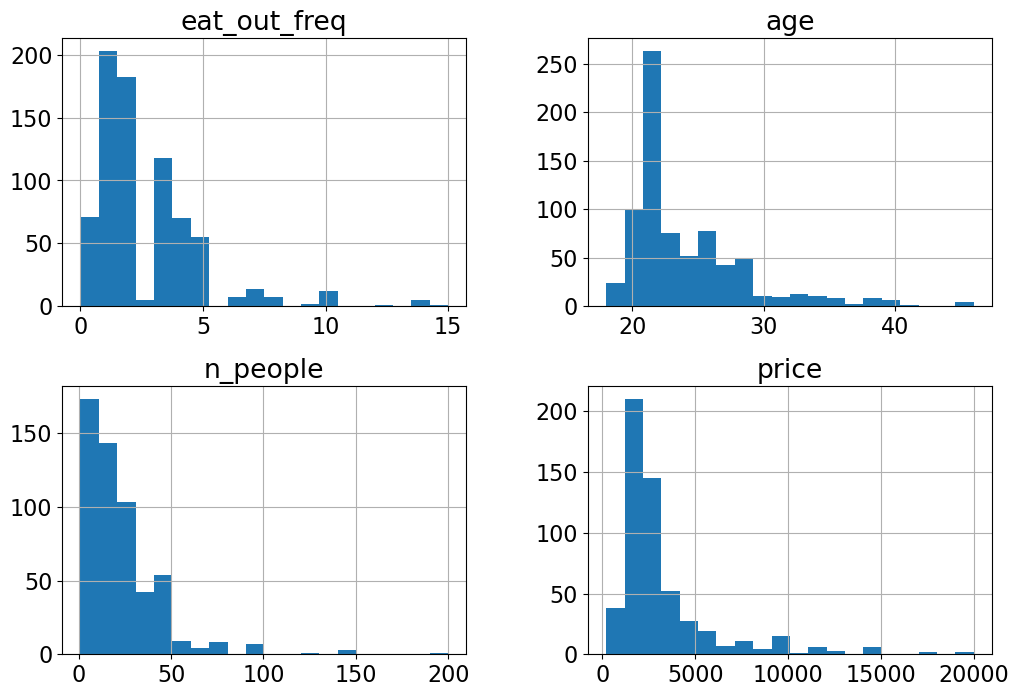

In [53]:
X_train.hist(bins=20, figsize=(12, 8));

Do you see anything interesting in these plots? 

In [54]:
X_train['food_type'].value_counts()

food_type
Other                189
Canadian/American    131
Chinese              102
Indian                36
Italian               32
Thai                  20
Fusion                18
Mexican               17
fusion                 3
Quebecois              1
Name: count, dtype: int64

Error in data collection? Probably "Fusion" and "fusion" categories should be combined?

In [55]:
X_train['food_type'] = X_train['food_type'].replace("fusion", "Fusion")
X_test['food_type'] = X_test['food_type'].replace("fusion", "Fusion")

In [56]:
X_train['food_type'].value_counts()

food_type
Other                189
Canadian/American    131
Chinese              102
Indian                36
Italian               32
Fusion                21
Thai                  20
Mexican               17
Quebecois              1
Name: count, dtype: int64

Again, usually we should spend lots of time in EDA, but let's stop here so that we have time to learn about transformers and pipelines.   

<br><br>

### Dummy Classifier

In [57]:
from sklearn.dummy import DummyClassifier

results_df = {}
dummy = DummyClassifier()
results_df['dummy'] = mean_std_cross_val_scores(dummy, X_train, y_train, return_train_score=True)
pd.DataFrame(results_df)

,dummy
fit_time,0.001 (+/- 0.001)
score_time,0.001 (+/- 0.001)
test_score,0.515 (+/- 0.002)
train_score,0.515 (+/- 0.000)


We have a relatively balanced distribution of both 'like' and 'dislike' classes.

<br><br>

### Preprocessing

How can we horizontally stack  
- preprocessed numeric features, 
- preprocessed binary features, 
- preprocessed ordinal features, and 
- preprocessed categorical features?

Let's define a column transformer. 

In [57]:
numeric_feats = ['age', 'n_people', 'price'] # Continuous and quantitative features
categorical_feats = ['north_america', 'food_type'] # Discrete and qualitative features
binary_feats = ['good_server'] # Categorical features with only two possible values 
ordinal_feats = ['noise_level'] # Some natural ordering in the categories 
noise_cats = ['no music', 'low', 'medium', 'high', 'crazy loud']
drop_feats = ['comments', 'restaurant_name', 'eat_out_freq'] # Dropping text feats and `eat_out_freq` because it's not that useful

In [58]:
X_train['noise_level'].value_counts()

noise_level
medium        232
low           186
high           75
no music       37
crazy loud     18
Name: count, dtype: int64

In [59]:
noise_levels = ["no music", "low", "medium", "high", "crazy loud"]

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.compose import make_column_transformer

numeric_transformer = make_pipeline(SimpleImputer(strategy="median"),
                                    StandardScaler()) 
binary_transformer = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                    OneHotEncoder(drop="if_binary"))
ordinal_transformer = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                    OrdinalEncoder(categories=[noise_levels]))
categorical_transformer = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                    OneHotEncoder(sparse_output=False, handle_unknown="ignore"))

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_feats), 
    (binary_transformer, binary_feats), 
    (ordinal_transformer, ordinal_feats),
    (categorical_transformer, categorical_feats),
    ("drop", drop_feats)
)


How does the transformed data look like? 

In [61]:
transformed = preprocessor.fit_transform(X_train)
transformed.shape

(753, 17)

In [62]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'n_people', 'price']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'))]),
                                 ['good_server']),
                                ('pipeline-3',...
                                                  OrdinalEncoder(categories=[['no '
                                                                              'music',
                                                                              'low',
                                                                              'medium',
                                                                              'high',
                                                                              'crazy '
                                                                              'loud']]))]),
                                 ['noise_level']),
                                ('pipeline-4',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['north_america', 'food_type']),
                                ('drop', 'drop',
                                 ['comments', 'restaurant_name',
                                  'eat_out_freq'])])

In [63]:
# Getting feature names from a column transformer
ohe_feat_names = preprocessor.named_transformers_['pipeline-4']['onehotencoder'].get_feature_names_out(categorical_feats).tolist()
ohe_feat_names

["north_america_Don't want to share",
 'north_america_No',
 'north_america_Yes',
 'food_type_Canadian/American',
 'food_type_Chinese',
 'food_type_Fusion',
 'food_type_Indian',
 'food_type_Italian',
 'food_type_Mexican',
 'food_type_Other',
 'food_type_Quebecois',
 'food_type_Thai']

In [64]:
numeric_feats

['age', 'n_people', 'price']

In [65]:
feat_names = numeric_feats + binary_feats + ordinal_feats + ohe_feat_names

In [66]:
transformed

array([[-0.66941678,  0.31029469, -0.36840629, ...,  0.        ,
         0.        ,  0.        ],
       [-0.66941678,  0.31029469, -0.05422496, ...,  0.        ,
         0.        ,  0.        ],
       [-0.89515383,  0.82336432, -0.25058829, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.89515383, -0.97237936, -0.64331495, ...,  0.        ,
         0.        ,  0.        ],
       [-0.89515383, -0.20277493, -0.25058829, ...,  1.        ,
         0.        ,  0.        ],
       [-0.89515383,  1.33643394, -0.05422496, ...,  0.        ,
         0.        ,  0.        ]])

In [67]:
pd.DataFrame(transformed, columns = feat_names)

,age,n_people,price,good_server,noise_level,north_america_Don't want to share,north_america_No,north_america_Yes,food_type_Canadian/American,food_type_Chinese,food_type_Fusion,food_type_Indian,food_type_Italian,food_type_Mexican,food_type_Other,food_type_Quebecois,food_type_Thai
0,-0.669417,0.310295,-0.368406,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.669417,0.310295,-0.054225,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.895154,0.823364,-0.250588,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.669417,-0.202775,-0.250588,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.007794,-0.202775,-0.054225,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0.685006,-0.715845,-0.643315,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749,0.007794,-0.613231,-0.918224,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
750,-0.895154,-0.972379,-0.643315,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
751,-0.895154,-0.202775,-0.250588,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


We have new columns for the categorical features. Let's create a pipeline with the preprocessor and SVC. 

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()    
}

for (name, model) in models.items():
    pipe_num_model = make_pipeline(SimpleImputer(strategy="median"), StandardScaler(), model)
    results_df[name +' (numeric-only)'] = mean_std_cross_val_scores(pipe_num_model, X_train[numeric_feats], y_train, return_train_score=True)
pd.DataFrame(results_df).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.515 (+/- 0.002),0.515 (+/- 0.000)
Decision Tree (numeric-only),0.003 (+/- 0.000),0.001 (+/- 0.000),0.497 (+/- 0.038),0.833 (+/- 0.010)
KNN (numeric-only),0.003 (+/- 0.001),0.004 (+/- 0.000),0.525 (+/- 0.034),0.674 (+/- 0.015)
SVM (numeric-only),0.012 (+/- 0.000),0.005 (+/- 0.000),0.587 (+/- 0.033),0.623 (+/- 0.006)


In [69]:
for (name, model) in models.items():
    pipe_model = make_pipeline(preprocessor, model)
    results_df[name + '(non-text feats)'] = mean_std_cross_val_scores(pipe_model, X_train, y_train, return_train_score=True)
pd.DataFrame(results_df).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.515 (+/- 0.002),0.515 (+/- 0.000)
Decision Tree (numeric-only),0.003 (+/- 0.000),0.001 (+/- 0.000),0.497 (+/- 0.038),0.833 (+/- 0.010)
KNN (numeric-only),0.003 (+/- 0.001),0.004 (+/- 0.000),0.525 (+/- 0.034),0.674 (+/- 0.015)
SVM (numeric-only),0.012 (+/- 0.000),0.005 (+/- 0.000),0.587 (+/- 0.033),0.623 (+/- 0.006)
Decision Tree(non-text feats),0.009 (+/- 0.000),0.003 (+/- 0.000),0.590 (+/- 0.039),0.889 (+/- 0.008)
KNN(non-text feats),0.008 (+/- 0.000),0.004 (+/- 0.000),0.598 (+/- 0.023),0.737 (+/- 0.008)
SVM(non-text feats),0.019 (+/- 0.000),0.008 (+/- 0.000),0.687 (+/- 0.011),0.733 (+/- 0.008)


We are getting better results when we include numeric, categorical, binary, ordinal features. 
<br><br><br>

### Incorporating text features 

We haven't incorporated the comments feature into our pipeline yet, even though it holds significant value in indicating whether the restaurant was liked or not.

In [70]:
X_train

,north_america,eat_out_freq,age,n_people,price,food_type,noise_level,good_server,comments,restaurant_name
80,No,2.0,21,30.0,2200.0,Chinese,high,No,The environment was very not clean. The food tasted awful.,NaN
934,Yes,4.0,21,30.0,3000.0,Canadian/American,low,Yes,The building and the room gave a very comfy feeling. Immediately after sitting down it felt like we were right at home.,NaN
911,No,4.0,20,40.0,2500.0,Canadian/American,medium,Yes,I was hungry,Chambar
459,Yes,5.0,21,NaN,NaN,Quebecois,NaN,NaN,NaN,NaN
62,Yes,2.0,24,20.0,3000.0,Indian,high,Yes,bad taste,east is east
...,...,...,...,...,...,...,...,...,...,...
106,No,3.0,27,10.0,1500.0,Chinese,medium,Yes,Food wasn't great.,NaN
333,No,1.0,24,12.0,800.0,Other,medium,Yes,NaN,NaN
393,Yes,4.0,20,5.0,1500.0,Canadian/American,low,No,NaN,NaN
376,Yes,5.0,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's create bag-of-words representation of the `comments` feature. But first we need to impute the rows where there are no comments. There is a small complication if we want to put `SimpleImputer` and `CountVectorizer` in a pipeline. 
- `SimpleImputer` takes a 2D array as input and produced 2D array as output. 
- `CountVectorizer` takes a 1D array as input. 

To deal with this, we will use sklearn's `FunctionTransformer` to convert the 2D output of `SimpleImputer` into a 1D array which can be passed to `CountVectorizer` as input. 

In [71]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer

reshape_for_countvectorizer = FunctionTransformer(lambda X: X.squeeze(), validate=False)
text_transformer = make_pipeline(SimpleImputer(strategy="constant", fill_value="missing"), 
                          reshape_for_countvectorizer, 
                          CountVectorizer(stop_words="english"))
text_pipe = make_pipeline(text_transformer, SVC())
cross_val_score(text_pipe, X_train[['comments']], y_train).mean()

0.6493951434878588

Pretty good scores just with text features! Let's examine the transformed data. 

In [72]:
transformed = text_transformer.fit_transform(X_train[['comments']], y_train)

In [73]:
transformed

<753x548 sparse matrix of type '<class 'numpy.int64'>'
	with 1841 stored elements in Compressed Sparse Row format>

It's a sparse matrix. Let's explore the the vocabulary. 

In [74]:
vocab = text_transformer.named_steps["countvectorizer"].get_feature_names_out()
vocab[:10]

array(['18', '30', '40mins', '65', 'actually', 'addition', 'affordable',
       'alcohol', 'ale', 'allergic'], dtype=object)

In [75]:
vocab[0:10]

array(['18', '30', '40mins', '65', 'actually', 'addition', 'affordable',
       'alcohol', 'ale', 'allergic'], dtype=object)

In [76]:
vocab[200:210]

array(['fusion', 'games', 'gave', 'general', 'genuinely', 'getting',
       'ginger', 'girlfriends', 'gluten', 'going'], dtype=object)

In [77]:
vocab[500:600]

array(['undressed', 'unfresh', 'uni', 'unique', 'unreasonable', 'upset',
       'usual', 'uwu', 'value', 'vancouver', 'variety', 'vds', 've',
       'vegan', 'vibe', 'vibes', 'vietnamese', 'view', 'visit', 'wait',
       'waited', 'waiter', 'waiters', 'waiting', 'waitress', 'walking',
       'want', 'warm', 'washrooms', 'wasn', 'water', 'watery', 'way',
       'weekend', 'went', 'wet', 'wife', 'wind', 'window', 'wine',
       'wings', 'winter', 'work', 'worst', 'wrong', 'yelling', 'yield',
       'yummy'], dtype=object)

In [78]:
vocab[0::20]

array(['18', 'ask', 'better', 'cash', 'closing', 'country', 'dessert',
       'drunk', 'expecting', 'figuring', 'fusion', 'having', 'impeccable',
       'knowledgeable', 'love', 'nice', 'pain', 'played', 'quality',
       'removed', 'sauces', 'sitting', 'spoke', 'tacky', 'time',
       'undressed', 'waited', 'wings'], dtype=object)

<br><br>

 Do we get better scores if we combine all features? Let's define a column transformer which carries out 
- imputation and scaling on numeric features
- imputation and one-hot encoding with `drop="if_binary"` on binary features
- imputation and one-hot encoding with `handle_unknown="ignore"` on categorical features
- imputation, reshaping, and bag-of-words transformation on the text feature

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
text_feat = ['comments']

preprocessor_all = make_column_transformer(
    (numeric_transformer, numeric_feats), 
    (binary_transformer, binary_feats), 
    (ordinal_transformer, ordinal_feats),
    (categorical_transformer, categorical_feats),
    (text_transformer, text_feat), 
    ("drop", drop_feats)
)

In [80]:
preprocessor_all.fit_transform(X_train)

<753x565 sparse matrix of type '<class 'numpy.float64'>'
	with 6927 stored elements in Compressed Sparse Row format>

In [81]:
for (name, model) in models.items():
    pipe_model = make_pipeline(text_transformer, model)
    results_df[name + '(text)'] = mean_std_cross_val_scores(pipe_model, X_train[['comments']], y_train, return_train_score=True)
pd.DataFrame(results_df).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.515 (+/- 0.002),0.515 (+/- 0.000)
Decision Tree (numeric-only),0.003 (+/- 0.000),0.001 (+/- 0.000),0.497 (+/- 0.038),0.833 (+/- 0.010)
KNN (numeric-only),0.003 (+/- 0.001),0.004 (+/- 0.000),0.525 (+/- 0.034),0.674 (+/- 0.015)
SVM (numeric-only),0.012 (+/- 0.000),0.005 (+/- 0.000),0.587 (+/- 0.033),0.623 (+/- 0.006)
Decision Tree(non-text feats),0.009 (+/- 0.000),0.003 (+/- 0.000),0.590 (+/- 0.039),0.889 (+/- 0.008)
KNN(non-text feats),0.008 (+/- 0.000),0.004 (+/- 0.000),0.598 (+/- 0.023),0.737 (+/- 0.008)
SVM(non-text feats),0.019 (+/- 0.000),0.008 (+/- 0.000),0.687 (+/- 0.011),0.733 (+/- 0.008)
Decision Tree(text),0.008 (+/- 0.001),0.001 (+/- 0.000),0.618 (+/- 0.036),0.735 (+/- 0.004)
KNN(text),0.004 (+/- 0.000),0.006 (+/- 0.002),0.572 (+/- 0.023),0.646 (+/- 0.026)
SVM(text),0.010 (+/- 0.000),0.003 (+/- 0.000),0.649 (+/- 0.022),0.728 (+/- 0.005)


In [82]:
for (name, model) in models.items():
    pipe_model = make_pipeline(preprocessor_all, model)
    results_df[name + '(all)'] = mean_std_cross_val_scores(pipe_model, X_train, y_train, return_train_score=True)
pd.DataFrame(results_df).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.515 (+/- 0.002),0.515 (+/- 0.000)
Decision Tree (numeric-only),0.003 (+/- 0.000),0.001 (+/- 0.000),0.497 (+/- 0.038),0.833 (+/- 0.010)
KNN (numeric-only),0.003 (+/- 0.001),0.004 (+/- 0.000),0.525 (+/- 0.034),0.674 (+/- 0.015)
SVM (numeric-only),0.012 (+/- 0.000),0.005 (+/- 0.000),0.587 (+/- 0.033),0.623 (+/- 0.006)
Decision Tree(non-text feats),0.009 (+/- 0.000),0.003 (+/- 0.000),0.590 (+/- 0.039),0.889 (+/- 0.008)
KNN(non-text feats),0.008 (+/- 0.000),0.004 (+/- 0.000),0.598 (+/- 0.023),0.737 (+/- 0.008)
SVM(non-text feats),0.019 (+/- 0.000),0.008 (+/- 0.000),0.687 (+/- 0.011),0.733 (+/- 0.008)
Decision Tree(text),0.008 (+/- 0.001),0.001 (+/- 0.000),0.618 (+/- 0.036),0.735 (+/- 0.004)
KNN(text),0.004 (+/- 0.000),0.006 (+/- 0.002),0.572 (+/- 0.023),0.646 (+/- 0.026)
SVM(text),0.010 (+/- 0.000),0.003 (+/- 0.000),0.649 (+/- 0.022),0.728 (+/- 0.005)


Some improvement when we combine all features! 